# **PREDIKSI GAGAL JANTUNG**

---



# **<span style="color:#6daa9f;">IMPORTING LIBRARIES</span>**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# **<span style="color:#6daa9f;">LOADING DATA</span>**

In [ ]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**Tentang datanya:**

* age: Usia pasien
* anemia: Jika pasien memiliki hemoglobin di bawah kisaran normal
* creatinine_phosphokinase: Kadar kreatin fosfokinase dalam darah dalam mcg/L
* diabetes: Jika pasien menderita diabetes
* injection_fraction: Fraksi ejeksi adalah ukuran berapa banyak darah yang dipompa ventrikel kiri pada setiap kontraksi
* high_blood_pressure: Jika pasien menderita hipertensi
* platelets : Jumlah trombosit darah dalam kilotrombosit/mL
* serum_creatinine : Kadar kreatinin serum dalam darah dalam mg/dL
* serum_sodium : Kadar natrium serum dalam darah dalam mEq/L
* jenis kelamin: Jenis kelamin pasien
* merokok: Jika pasien merokok aktif atau pernah merokok di masa lalu
* waktu : Merupakan waktu kunjungan tindak lanjut penyakit pasien dalam beberapa bulan
* DEATH_EVENT: Jika pasien meninggal selama masa tindak lanjut


# **<span style="color:#6daa9f;">DATA ANALYSIS</span>**

Langkah-langkah data analisis dan visualisasi:

Analisis dimulai dengan membuat plot hitungan dari atribut target. Matriks korelasi berbagai atribut berguna untuk memeriksa pentingnya fitur.



<Axes: xlabel='DEATH_EVENT', ylabel='count'>

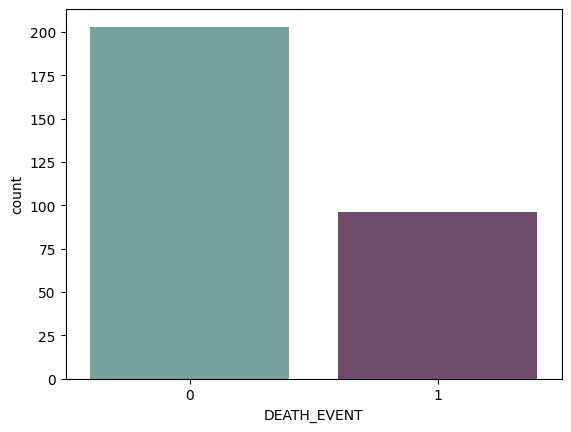

In [ ]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["#6daa9f","#774571"]
sns.countplot(x= data["DEATH_EVENT"], palette= cols)

Dapat dilihat bahwa ada ketidakseimbangan pada data.

Selanjutnya, akan dibuat heatmap yang berisi matriks korelasi antar semua fitur data.

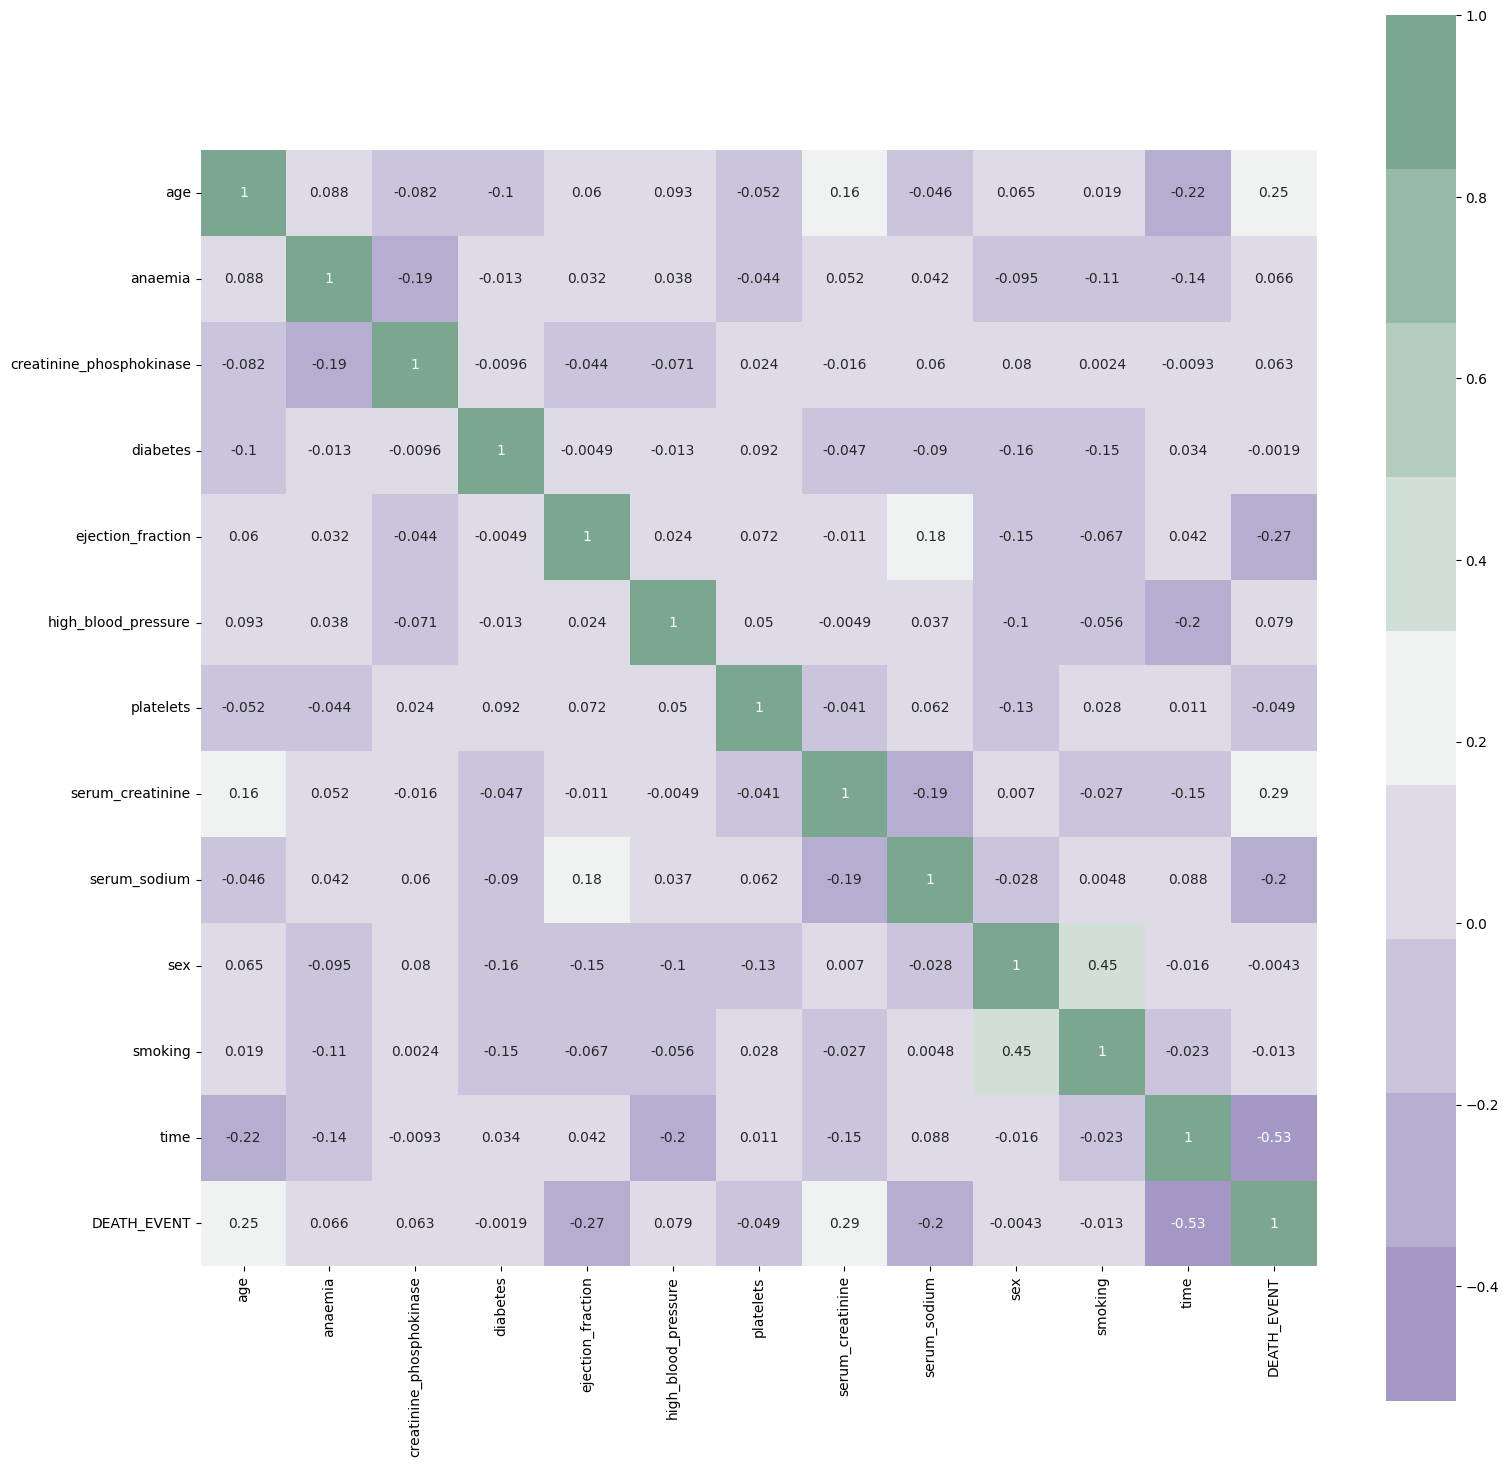

In [ ]:
#Examaning a corelation matrix of all the features
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

Berdasarkan *heatmap* tersebut, diketahui bahwa semakin jelas warna plot mendekati hijau atau ungu maka korelasi antar data lebih tinggi. Sebaliknya jika warna plot semakin mendekati warna netral maka korelasi data semakin rendah.

**Poin penting:**
* Waktu kunjungan (time) tindak lanjut pasien untuk penyakit ini sangat penting karena diagnosis awal masalah kardiovaskular dan pengobatan mengurangi kemungkinan kematian. Ini berlaku hubungan terbalik.
* Ejection fraction adalah fitur terpenting kedua. Hal ini cukup jelas karena pada dasarnya adalah efisiensi jantung.
* Usia pasien adalah fitur ketiga yang paling berkorelasi. Jelas karena fungsi jantung menurun seiring bertambahnya usia

**Selanjutnya, kita akan memeriksa plot hitungan usia.**

Text(0.5, 1.0, 'Distribution Of Age')

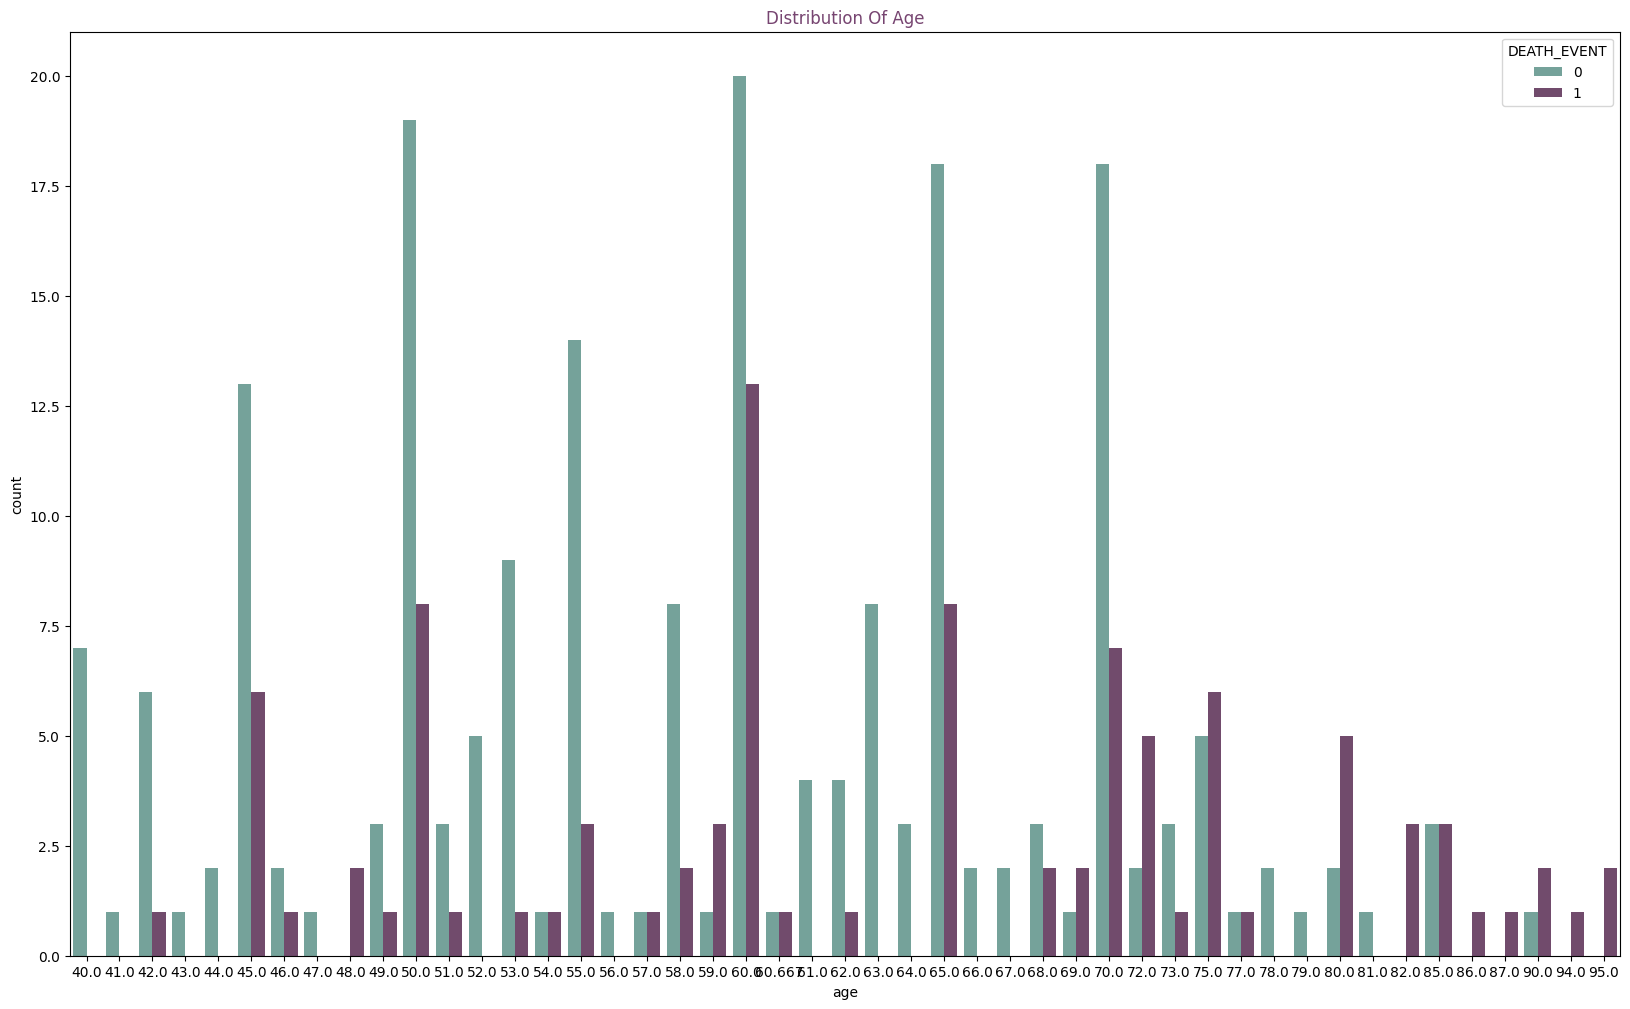

In [ ]:
#Evaluating age distrivution
plt.figure(figsize=(20,12))
#colours =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]
Days_of_week=sns.countplot(x=data['age'],data=data, hue ="DEATH_EVENT",palette = cols)
Days_of_week.set_title("Distribution Of Age", color="#774571")

Diperoleh sebuah bar plot yang menampilkan distribusi usia berdasarkan kategori *death event*.

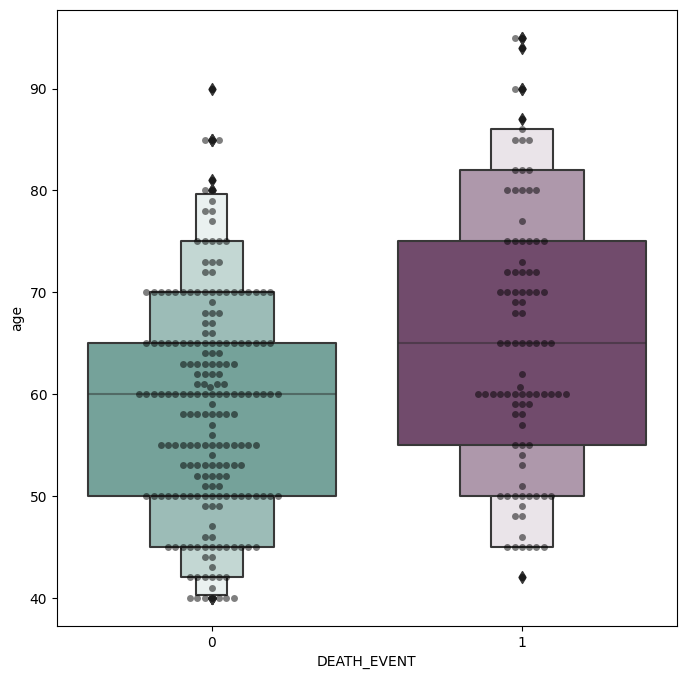

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


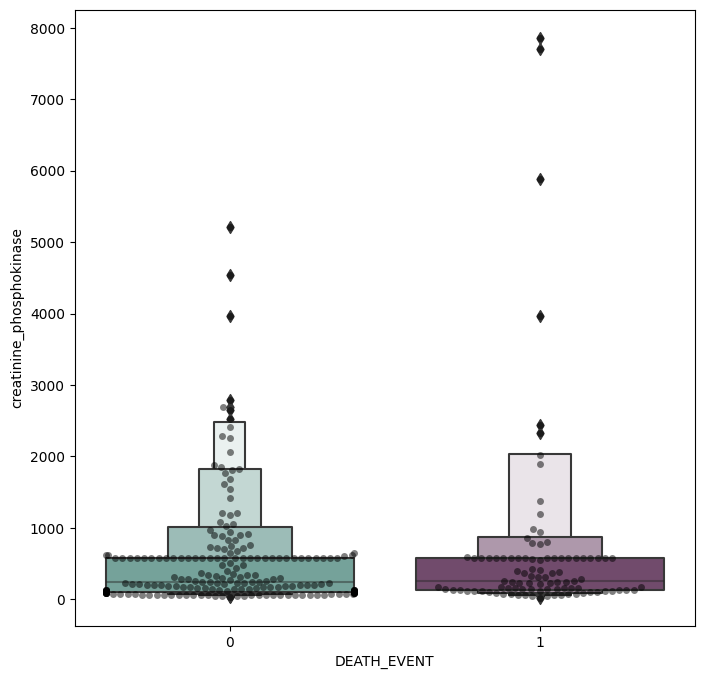

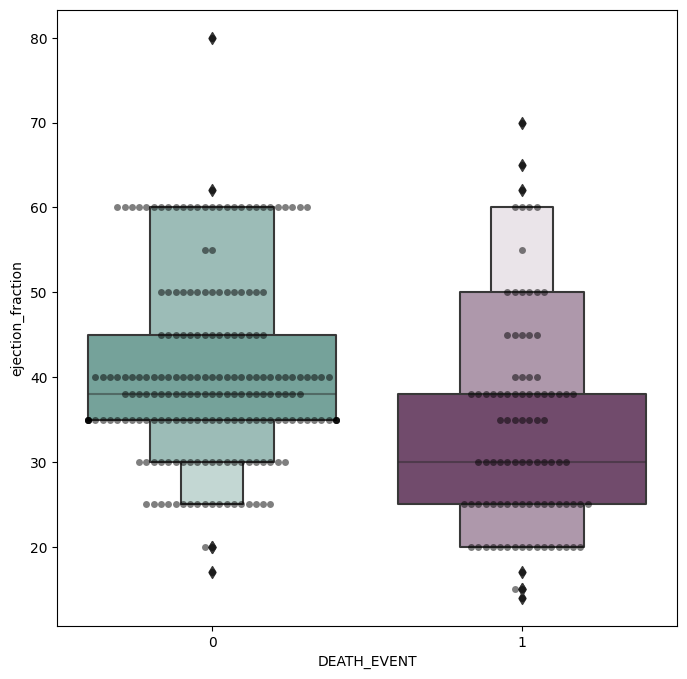

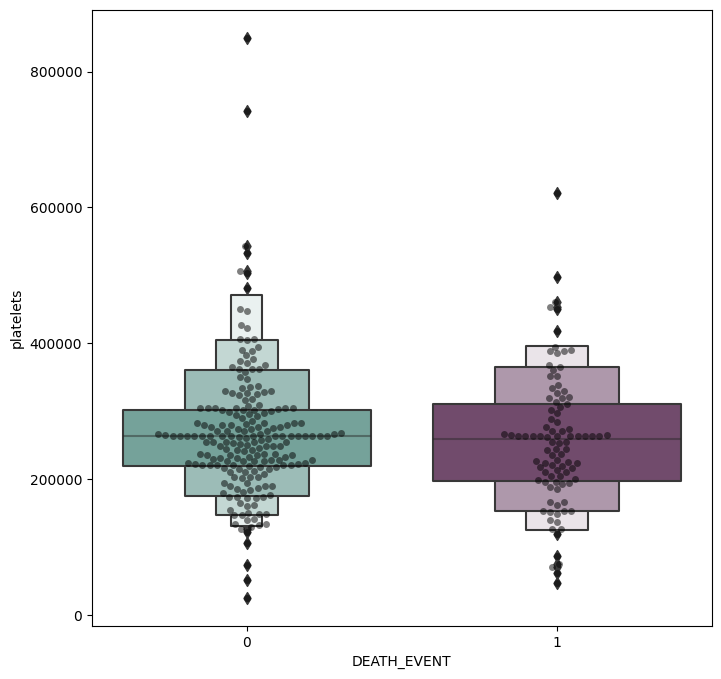

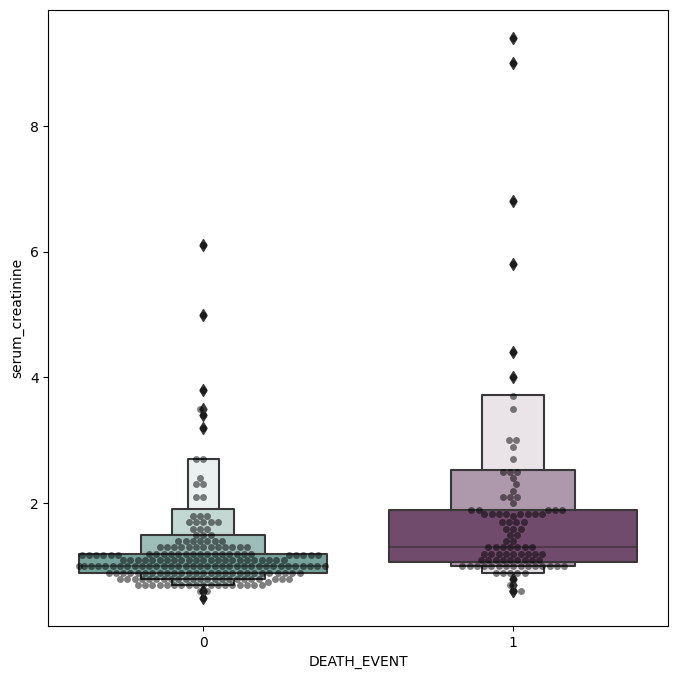

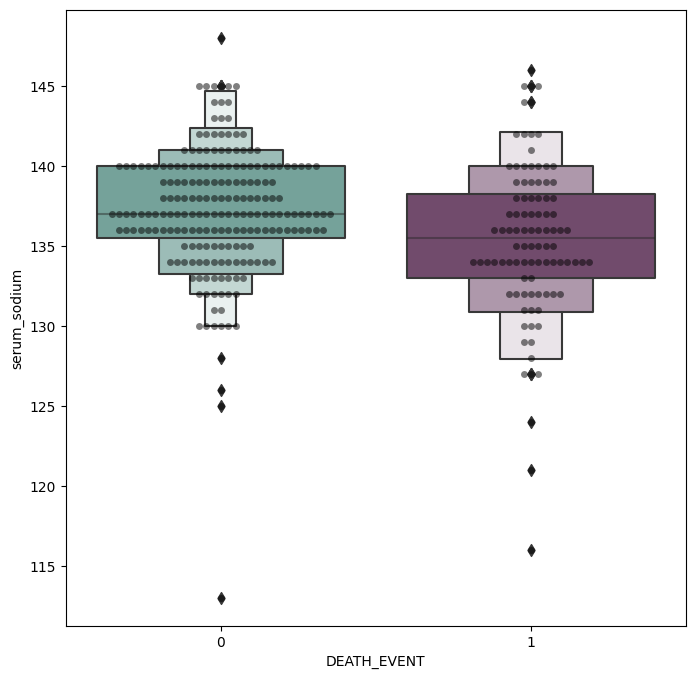

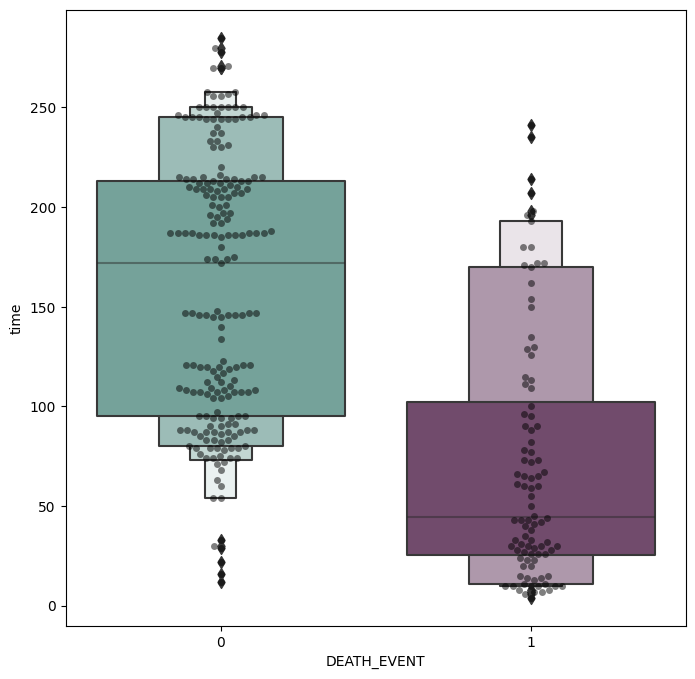

In [ ]:
# Boxen and swarm plot of some non binary features.
feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature:
    plt.figure(figsize=(8,8))
    sns.swarmplot(x=data["DEATH_EVENT"], y=data[i], color="black", alpha=0.5)
    sns.boxenplot(x=data["DEATH_EVENT"], y=data[i], palette=cols)
    plt.show()

Terdapat outlier pada kumpulan data tersebut. Data tersebut tidak dihapus karena dapat menyebabkan *overfitting*. Meskipun dimungkinan mendapatkan statistik yang lebih baik. Dalam hal ini, dengan data medis, outlier mungkin menjadi faktor penentu yang penting.

Selanjutnya, memeriksa kdeplot waktu dan usia karena keduanya merupakan fitur yang signifikan.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


# **<span style="color:#6daa9f;">DATA PREPROCESSING</span>**

**Langkah-langkah Data Preprocessing**
* Menghilangkan outlier berdasarkan analisis data
* Menetapkan nilai pada fitur sebagai x dan target sebagai y
* Melakukan penskalaan fitur
* Splitting data pelatihan dan data pengujian

In [ ]:
#assigning values to features as X and target as y
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

In [ ]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


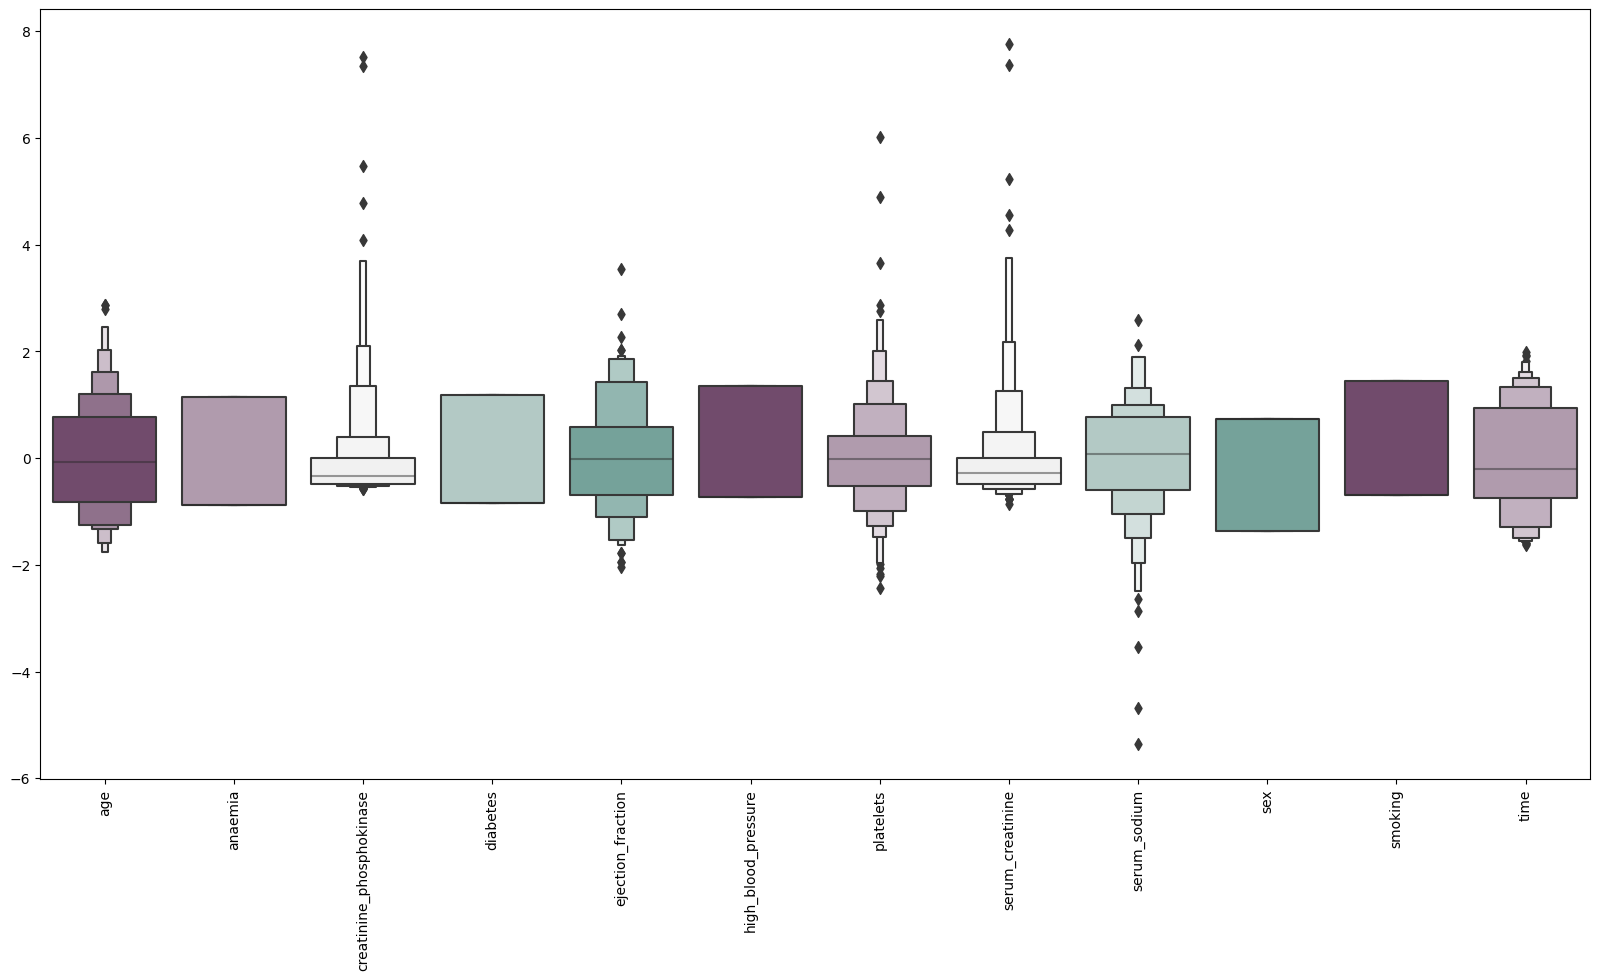

In [ ]:
#looking at the scaled features
colours =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=7)

# **<span style="color:#6daa9f;">MODEL BUILDING</span>**

Dalam proyek ini, dibangun jaringan syaraf tiruan (Artificial Neural Network (ANN)).

**Langkah-langkah dalam pembuatan model**
* Menginisialisasi ANN
* Mendefinisikan dengan menambahkan lapisan
* Menyusun ANN
* Latih ANN

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the ANN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from keras.optimizers import SGD

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 500,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/500
6/6 [==============================] - 2s 117ms/step - loss: 0.6928 - accuracy: 0.6257 - val_loss: 0.6922 - val_accuracy: 0.6667
Epoch 2/500
6/6 [==============================] - 0s 27ms/step - loss: 0.6920 - accuracy: 0.6480 - val_loss: 0.6913 - val_accuracy: 0.6667
Epoch 3/500
6/6 [==============================] - 0s 42ms/step - loss: 0.6911 - accuracy: 0.6480 - val_loss: 0.6903 - val_accuracy: 0.6667
Epoch 4/500
6/6 [==============================] - 0s 36ms/step - loss: 0.6903 - accuracy: 0.6480 - val_loss: 0.6894 - val_accuracy: 0.6667
Epoch 5/500
6/6 [==============================] - 0s 24ms/step - loss: 0.6895 - accuracy: 0.6480 - val_loss: 0.6884 - val_accuracy: 0.6667
Epoch 6/500
6/6 [==============================] - 0s 26ms/step - loss: 0.6887 - accuracy: 0.6480 - val_loss: 0.6875 - val_accuracy: 0.6667
Epoch 7/500
6/6 [==============================] - 0s 29ms/step - loss: 0.6878 - accuracy: 0.6480 - val_loss: 0.6866 - val_accuracy: 0.6667
Epoch 8/500
6/6 [==

In [ ]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 76.06%


**Merencanakan training loss dan validation loss selama epoch**

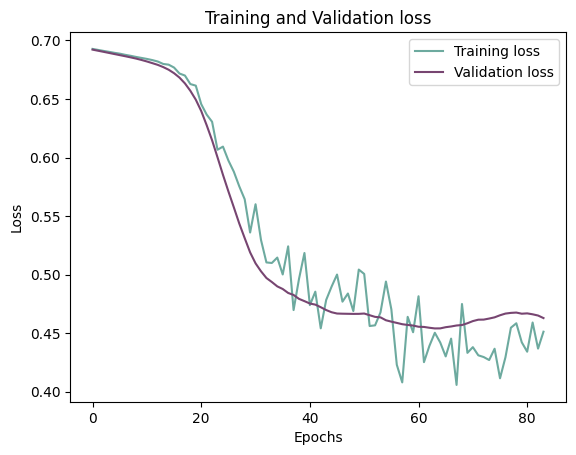

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

**Merencanakan training accuracy dan validation accuracy selama epoch**

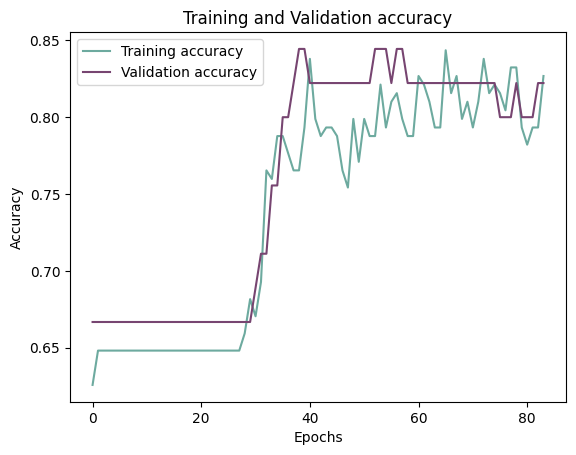

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **<span style="color:#6daa9f;">KESIMPULAN</span>**

**Menyimpulkan model dengan:**

* Pengujian pada data pengujian
* Mengevaluasi confusion matrix
* Mengevaluasi laporan klasifikasi

In [ ]:
# Predicting the test set results
y_pred = model.predict(X_atest)
y_pred = (y_pred > 0.5)
np.set_printoptions()

3/3 [==============================] - 0s 4ms/step


<Axes: >

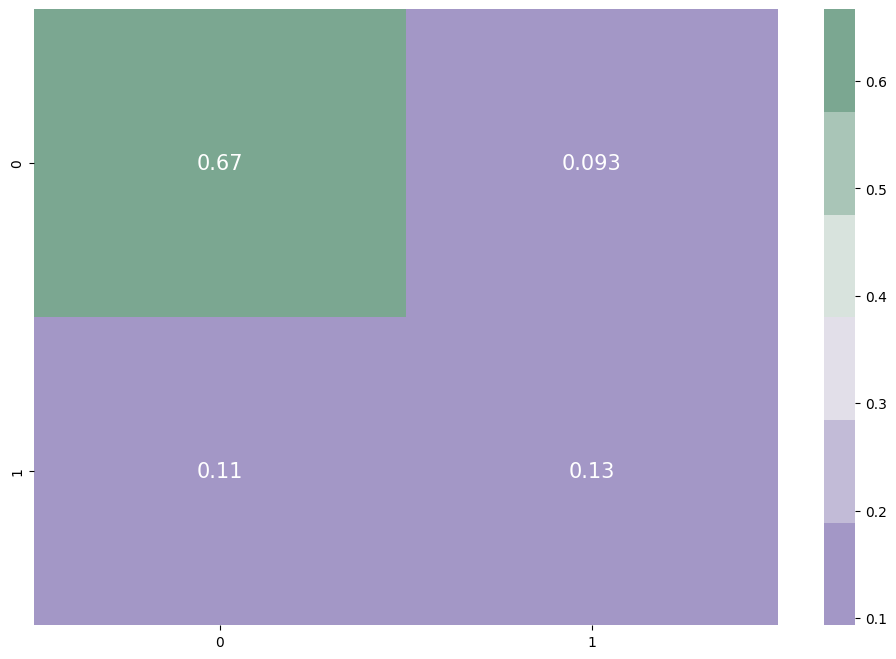

In [ ]:
# confusion matrix
cmap1 = sns.diverging_palette(275,150,  s=40, l=65, n=6)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        57
           1       0.59      0.56      0.57        18

    accuracy                           0.80        75
   macro avg       0.73      0.72      0.72        75
weighted avg       0.80      0.80      0.80        75

